<a href="https://colab.research.google.com/github/paucaroscanoa/Series-de-Tiemop---UNI/blob/master/Modelo_Var.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modelo Serie Tiempo Multivariante - VAR**

Análisis exploratorios de los datos.
Dividir la serie en conjuntos de entrenamiento y prueba.
Prueba de estacionariedad.
Transformar la serie de entrenamiento si es necesario.
Construir un modelo VAR sobre las series transformadas.
Causalidad de Granger.
Diagnóstico del modelo.
Realizar pronósticos utilizando el modelo finalmente elegido.
Transformación inversa del pronóstico a la escala original.
Realizar una evaluación del pronóstico.

### Los datos: Yahoo Finance
Si quieres tener los datos de precios, entidades, activos, etc, actualizados, lo puedes hacer de la siguiente manera. Estos datos han sido obtenidos mediante Yahoo Finance, una plataforma donde puedes ver, obtener, estudiar, analizar y comparar los precios de cierre de diferentes de acciones de los mercados financieros. La forma de obtener los datos de Yahoo Finance en Python es mediante el paquete yfinance que tendremos que instalar e importar. https://pypi.org/project/yfinance/#description

In [1]:
import requests

In [2]:
pip install yfinance

In [3]:
import yfinance as yf

## VARIABLES: Precios del Oro, Plata, Petróleo, Índice SP500, Cambio USD/EUR y el Índice de rendimiento de bonos del tesoro .

In [4]:
raw_data = yf.download (tickers = "GC=F, SI=F, EUR=X, CL=F, ^GSPC, ^TNX", start = "2005-01-07",
                              end = "2020-06-03", interval = "1d", group_by = 'ticker', auto_adjust = True)
#
raw_data

[*********************100%***********************]  6 of 6 completed


Ticker                            GC=F                                         \
Price                             Open         High          Low        Close   
Date                                                                            
2005-01-07 00:00:00+00:00   423.700012   423.700012   418.700012   418.899994   
2005-01-10 00:00:00+00:00   419.100006   419.100006   419.100006   419.100006   
2005-01-11 00:00:00+00:00   421.899994   421.899994   421.899994   421.899994   
2005-01-12 00:00:00+00:00   423.799988   423.799988   423.799988   426.100006   
2005-01-13 00:00:00+00:00   424.700012   424.700012   424.700012   424.500000   
...                                ...          ...          ...          ...   
2020-05-27 00:00:00+00:00  1685.599976  1710.300049  1685.599976  1710.300049   
2020-05-28 00:00:00+00:00  1709.300049  1727.800049  1705.000000  1713.300049   
2020-05-29 00:00:00+00:00  1718.800049  1738.300049  1715.099976  1736.900024   
2020-06-01 00:00:00+00:00  1740.400024  1747.000000  1727.099976  1737.800049   
2020-06-02 00:00:00+00:00  1743.000000  1745.500000  1721.800049  1725.199951   

Ticker                                     ^GSPC                            \
Price                        Volume         Open         High          Low   
Date                                                                         
2005-01-07 00:00:00+00:00       1.0  1187.890015  1192.199951  1182.160034   
2005-01-10 00:00:00+00:00       1.0  1186.189941  1194.780029  1184.800049   
2005-01-11 00:00:00+00:00       1.0  1190.250000  1190.250000  1180.430054   
2005-01-12 00:00:00+00:00       1.0  1182.989990  1187.920044  1175.640015   
2005-01-13 00:00:00+00:00       1.0  1187.699951  1187.699951  1175.810059   
...                             ...          ...          ...          ...   
2020-05-27 00:00:00+00:00  137416.0  3015.649902  3036.250000  2969.750000   
2020-05-28 00:00:00+00:00   23355.0  3046.610107  3068.669922  3023.399902   
2020-05-29 00:00:00+00:00    1526.0  3025.169922  3049.169922  2998.610107   
2020-06-01 00:00:00+00:00     871.0  3038.780029  3062.179932  3031.540039   
2020-06-02 00:00:00+00:00     741.0  3064.780029  3081.070068  3051.639893   

Ticker                                                ...   ^TNX         \
Price                            Close        Volume  ...   Open   High   
Date                                                  ...                 
2005-01-07 00:00:00+00:00  1186.189941  1.477900e+09  ...  4.255  4.313   
2005-01-10 00:00:00+00:00  1190.250000  1.490400e+09  ...  4.270  4.295   
2005-01-11 00:00:00+00:00  1182.989990  1.488800e+09  ...  4.287  4.297   
2005-01-12 00:00:00+00:00  1187.699951  1.562100e+09  ...  4.254  4.271   
2005-01-13 00:00:00+00:00  1177.449951  1.510300e+09  ...  4.236  4.236   
...                                ...           ...  ...    ...    ...   
2020-05-27 00:00:00+00:00  3036.129883  6.398000e+09  ...  0.723  0.723   
2020-05-28 00:00:00+00:00  3029.729980  5.447020e+09  ...  0.687  0.713   
2020-05-29 00:00:00+00:00  3044.310059  7.297550e+09  ...  0.664  0.685   
2020-06-01 00:00:00+00:00  3055.729980  4.684170e+09  ...  0.667  0.687   
2020-06-02 00:00:00+00:00  3080.820068  5.197150e+09  ...  0.685  0.687   

Ticker                                            EUR=X                    \
Price                        Low  Close Volume     Open     High      Low   
Date                                                                        
2005-01-07 00:00:00+00:00  4.148  4.285    0.0  0.75861  0.76746  0.75483   
2005-01-10 00:00:00+00:00  4.260  4.278    0.0  0.76476  0.76546  0.76220   
2005-01-11 00:00:00+00:00  4.238  4.244    0.0  0.76254  0.76307  0.75924   
2005-01-12 00:00:00+00:00  4.222  4.236    0.0  0.76254  0.76412  0.75239   
2005-01-13 00:00:00+00:00  4.173  4.187    0.0  0.75420  0.75740  0.75381   
...                          ...    ...    ...      ...      ...      ...   
2020-05-27 00:00:00+00:00  0

In [5]:
#Hacemos un copia de la base de datos e incontramos las 5 nuevas columnas "gold, silver, Oil. Tresury,S&P500,forex USD/EUR"
df_comp=raw_data.copy()
df_comp['Gold'] = df_comp['GC=F'].Close[:]
df_comp['Silver'] = df_comp['SI=F'].Close[:]
df_comp['Oil'] = df_comp['CL=F'].Close[:]
df_comp['Treasury'] = df_comp['^TNX'].Close[:]
df_comp['SP500'] = df_comp['^GSPC'].Close[:]
df_comp['USD/EUR'] = df_comp['EUR=X'].Close[:]

In [6]:
df_comp.head()

Ticker                           GC=F                                      \
Price                            Open        High         Low       Close   
Date                                                                        
2005-01-07 00:00:00+00:00  423.700012  423.700012  418.700012  418.899994   
2005-01-10 00:00:00+00:00  419.100006  419.100006  419.100006  419.100006   
2005-01-11 00:00:00+00:00  421.899994  421.899994  421.899994  421.899994   
2005-01-12 00:00:00+00:00  423.799988  423.799988  423.799988  426.100006   
2005-01-13 00:00:00+00:00  424.700012  424.700012  424.700012  424.500000   

Ticker                                  ^GSPC                            \
Price                     Volume         Open         High          Low   
Date                                                                      
2005-01-07 00:00:00+00:00    1.0  1187.890015  1192.199951  1182.160034   
2005-01-10 00:00:00+00:00    1.0  1186.189941  1194.780029  1184.800049   
2005-01-11 00:00:00+00:00    1.0  1190.250000  1190.250000  1180.430054   
2005-01-12 00:00:00+00:00    1.0  1182.989990  1187.920044  1175.640015   
2005-01-13 00:00:00+00:00    1.0  1187.699951  1187.699951  1175.810059   

Ticker                                                ...    EUR=X           \
Price                            Close        Volume  ...     High      Low   
Date                                                  ...                     
2005-01-07 00:00:00+00:00  1186.189941  1.477900e+09  ...  0.76746  0.75483   
2005-01-10 00:00:00+00:00  1190.250000  1.490400e+09  ...  0.76546  0.76220   
2005-01-11 00:00:00+00:00  1182.989990  1.488800e+09  ...  0.76307  0.75924   
2005-01-12 00:00:00+00:00  1187.699951  1.562100e+09  ...  0.76412  0.75239   
2005-01-13 00:00:00+00:00  1177.449951  1.510300e+09  ...  0.75740  0.75381   

Ticker                                           Gold Silver        Oil  \
Price                        Close Volume                                 
Date                                                                      
2005-01-07 00:00:00+00:00  0.76564    0.0  418.899994  6.429  45.430000   
2005-01-10 00:00:00+00:00  0.76278    0.0  419.100006  6.431  45.330002   
2005-01-11 00:00:00+00:00  0.76237    0.0  421.899994  6.623  45.680000   
2005-01-12 00:00:00+00:00  0.75438    0.0  426.100006  6.728  46.369999   
2005-01-13 00:00:00+00:00  0.75694    0.0  424.500000  6.730  48.040001   

Ticker                    Treasury        SP500  USD/EUR  
Price                                                     
Date                                                      
2005-01-07 00:00:00+00:00    4.285  1186.189941  0.76564  
2005-01-10 00:00:00+00:00    4.278  1190.250000  0.76278  
2005-01-11 00:00:00+00:00    4.244  1182.989990  0.76237  
2005-01-12 00:00:00+00:00    4.236  1187.699951  0.75438  
2005-01-13 00:00:00+00:00    4.187  1177.449951  0.75694  

[5 rows x 36 columns]

In [7]:
del df_comp['GC=F']
del df_comp['SI=F']
del df_comp['CL=F']
del df_comp['^TNX']
del df_comp['^GSPC']
del df_comp['EUR=X']

In [8]:
df_comp.head()

Ticker,Gold,Silver,Oil,Treasury,SP500,USD/EUR
Price,,,,,,
Date,,,,,,
2005-01-07 00:00:00+00:00,418.899994,6.429,45.430000,4.285,1186.189941,0.76564
2005-01-10 00:00:00+00:00,419.100006,6.431,45.330002,4.278,1190.250000,0.76278
2005-01-11 00:00:00+00:00,421.899994,6.623,45.680000,4.244,1182.989990,0.76237
2005-01-12 00:00:00+00:00,426.100006,6.728,46.369999,4.236,1187.699951,0.75438
2005-01-13 00:00:00+00:00,424.500000,6.730,48.040001,4.187,1177.449951,0.75694


In [9]:
#Datos nulos o faltantes,
df_comp.isnull().sum()

,,0
Ticker,Price,
Gold,,149
Silver,,148
Oil,,145
Treasury,,147
SP500,,142
USD/EUR,,28


In [10]:
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')
df_comp.isnull().sum()

<ipython-input-10-e20d5fd0dccd>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_comp=df_comp.fillna(method='ffill')


,,0
Ticker,Price,
Gold,,0
Silver,,0
Oil,,0
Treasury,,0
SP500,,0
USD/EUR,,0


In [11]:
df_comp.columns = ['Gold', 'Silver', 'Oil', 'Treasury','SP500','USD/EUR']
df_comp.head()

,Gold,Silver,Oil,Treasury,SP500,USD/EUR
Date,,,,,,
2005-01-07 00:00:00+00:00,418.899994,6.429,45.430000,4.285,1186.189941,0.76564
2005-01-10 00:00:00+00:00,419.100006,6.431,45.330002,4.278,1190.250000,0.76278
2005-01-11 00:00:00+00:00,421.899994,6.623,45.680000,4.244,1182.989990,0.76237
2005-01-12 00:00:00+00:00,426.100006,6.728,46.369999,4.236,1187.699951,0.75438
2005-01-13 00:00:00+00:00,424.500000,6.730,48.040001,4.187,1177.449951,0.75694


In [12]:
#Guardar el dataset
df_comp.to_csv('Market2024.csv')

## Análisis exploratorio

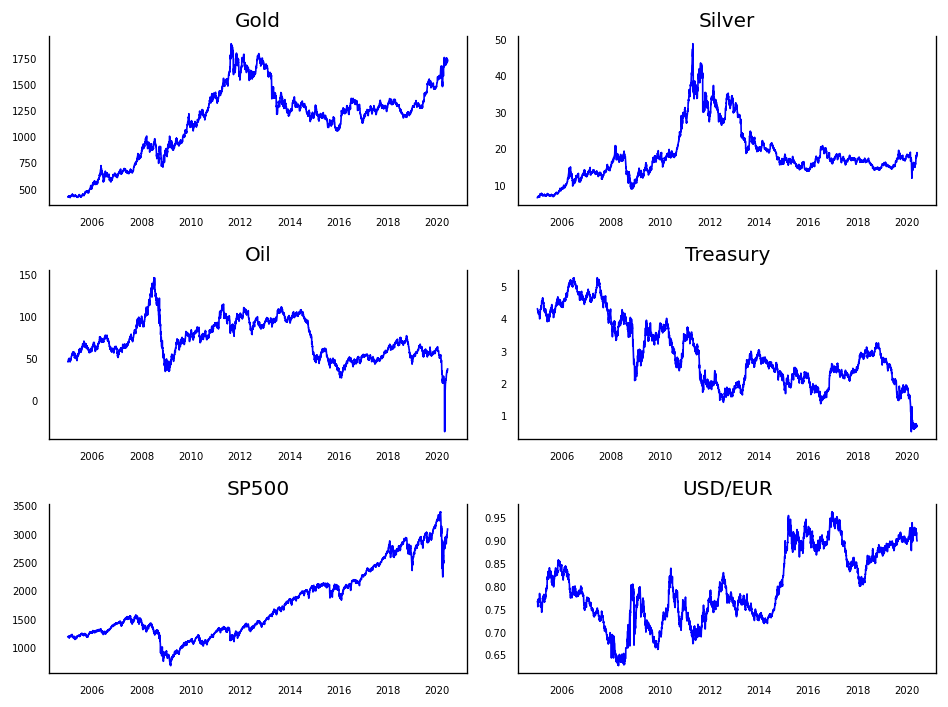

In [14]:
# Plots
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(8,6))
for i, ax in enumerate(axes.flatten()):
 data = df_comp[df_comp.columns[i]]
 ax.plot(data, color='blue', linewidth=1)
 ax.set_title(df_comp.columns[i])
 ax.xaxis.set_ticks_position('none')
 ax.yaxis.set_ticks_position('none')
 ax.spines['top'].set_alpha(0)
 ax.tick_params(labelsize=6)
 plt.tight_layout();

In [15]:
corr=df_comp.corr()
corr

,Gold,Silver,Oil,Treasury,SP500,USD/EUR
Gold,1.000000,0.790730,0.200925,-0.842099,0.393351,0.165017
Silver,0.790730,1.000000,0.541254,-0.455371,-0.097715,-0.269687
Oil,0.200925,0.541254,1.000000,0.168495,-0.386262,-0.751603
Treasury,-0.842099,-0.455371,0.168495,1.000000,-0.502857,-0.464867
SP500,0.393351,-0.097715,-0.386262,-0.502857,1.000000,0.704467
USD/EUR,0.165017,-0.269687,-0.751603,-0.464867,0.704467,1.000000


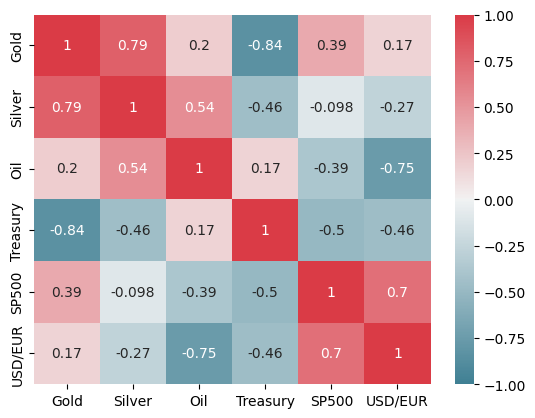

In [16]:
import seaborn as sns
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True,vmax=1, vmin=-1, cmap =sns.diverging_palette(220, 10, as_cmap=True),center=0 )
plt.show()

## Dividir los datos en conjunto de Entrenamiento y Prueba
El modelo VAR se ajustará al conjunto de entrenamiento X_train y luego se utilizará el modelo para pronosticar las próximas 15 observaciones. Estos pronósticos se compararán con los datos reales del conjunto de prueba

In [17]:
n_obs=15
X_train, X_test = df_comp[0:-n_obs], df_comp[-n_obs:]
print(X_train.shape, X_test.shape)

(4003, 6) (15, 6)


# Prueba de estacionariedad
Necesitamos que los datos sean estacionarios para poder usar el modelo VAR. Vamos a averiguarlo haciendo un Test de Dickey-Fuller aumentado, a cada variable univariante que tiene nuestro dataset.

In [18]:
import statsmodels.tsa.stattools as sts
def augmented_dickey_fuller_statistics(time_series):
  result = sts.adfuller(time_series.values)
  print('p-value: %f' % result[1])

print('Test de Dickey-Fuller Aumentado:')
print('Serie de tiempo Precio del Oro')
augmented_dickey_fuller_statistics(X_train['Gold'])
print('Serie de tiempo Precio de la Plata')
augmented_dickey_fuller_statistics(X_train['Silver'])
print('Serie de tiempo Precio del Petróleo')
augmented_dickey_fuller_statistics(X_train['Oil'])
print('Serie de tiempo Índice del rendimiento de bonos del tesoro en 10 años')
augmented_dickey_fuller_statistics(X_train['Treasury'])
print('Serie de tiempo Índice SP500')
augmented_dickey_fuller_statistics(X_train['SP500'])
print('Serie de tiempo Cambio USD/EUR')
augmented_dickey_fuller_statistics(X_train['USD/EUR'])

Test de Dickey-Fuller Aumentado:
Serie de tiempo Precio del Oro
p-value: 0.512554
Serie de tiempo Precio de la Plata
p-value: 0.300779
Serie de tiempo Precio del Petróleo
p-value: 0.106259
Serie de tiempo Índice del rendimiento de bonos del tesoro en 10 años
p-value: 0.668475
Serie de tiempo Índice SP500
p-value: 0.941980
Serie de tiempo Cambio USD/EUR
p-value: 0.574155


Todos los p-valores son mayores que 0.05, con lo cual no se rechaza la hipótesis nula de que la serie no es estacionaria. Habría que transformar los datos porque no se puede confirmar estacionariedad.

## Transformación de los datos
La aplicación de la primera diferenciación en el conjunto de entrenamiento debería hacer que todas las series 6 sean estacionarias. Sin embargo, este es un proceso iterativo en el que, después de la primera diferenciación, es posible que la serie siga siendo no estacionaria. Tendremos que aplicar una segunda diferencia o transformación logarítmica para estandarizar la serie en tales casos.

In [19]:
X_train_transformed=X_train.diff().dropna()
X_train_transformed.head()

,Gold,Silver,Oil,Treasury,SP500,USD/EUR
Date,,,,,,
2005-01-10 00:00:00+00:00,0.200012,0.002,-0.099998,-0.007,4.060059,-0.00286
2005-01-11 00:00:00+00:00,2.799988,0.192,0.349998,-0.034,-7.260010,-0.00041
2005-01-12 00:00:00+00:00,4.200012,0.105,0.689999,-0.008,4.709961,-0.00799
2005-01-13 00:00:00+00:00,-1.600006,0.002,1.670002,-0.049,-10.250000,0.00256
2005-01-14 00:00:00+00:00,-1.799988,-0.150,0.340000,0.029,7.070068,0.00648


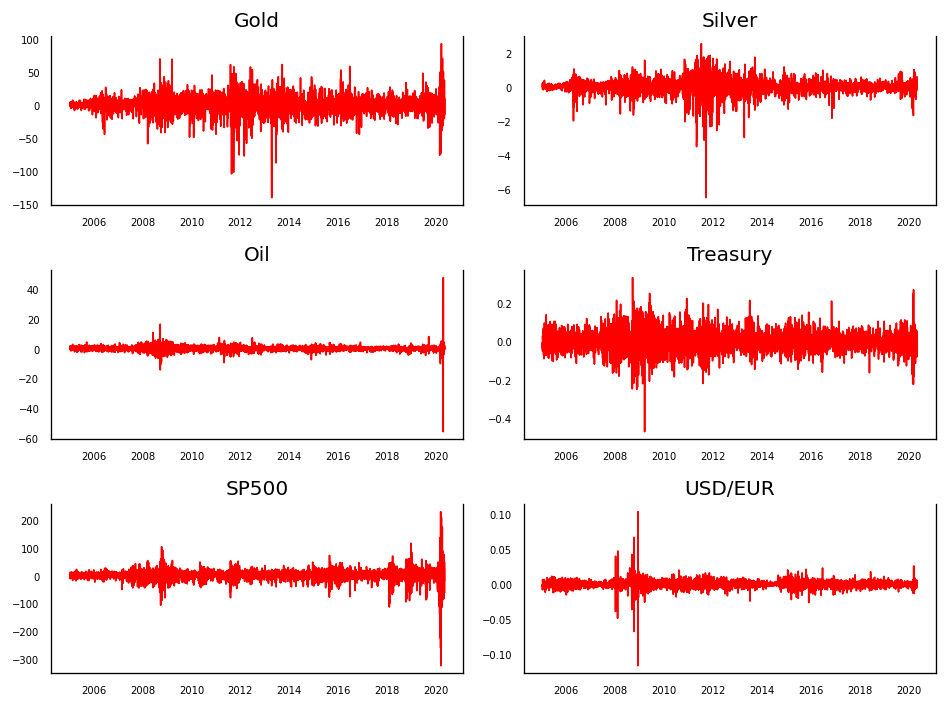

In [20]:
# Dibujemos los datos transformados
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(8,6))
for i, ax in enumerate(axes.flatten()):
  d = X_train_transformed[X_train_transformed.columns[i]]
  ax.plot(d, color='red', linewidth=1)
  ax.set_title(df_comp.columns[i])
  ax.xaxis.set_ticks_position('none')
  ax.yaxis.set_ticks_position('none')
  ax.spines['top'].set_alpha(0)
  ax.tick_params(labelsize=6)
  plt.tight_layout();

Chequeando si los datos transformados (diferenciados) son estacionarios:

In [21]:
print('Test de Dickey-Fuller Aumentado:')
print('Serie de tiempo Precio del Oro Diferenciada')
augmented_dickey_fuller_statistics(X_train_transformed['Gold'])
print('Serie de tiempo Precio de la Plata Diferenciada')
augmented_dickey_fuller_statistics(X_train_transformed['Silver'])
print('Serie de tiempo Precio del Petróleo Diferenciada')
augmented_dickey_fuller_statistics(X_train_transformed['Oil'])
print('Serie de tiempo Índice del rendimiento de bonos del tesoro en 10 años Diferenciada')
augmented_dickey_fuller_statistics(X_train_transformed['Treasury'])
print('Serie de tiempo Índice SP500 Diferenciada')
augmented_dickey_fuller_statistics(X_train_transformed['SP500'])
print('Serie de tiempo Cambio USD/EUR Diferenciada')
augmented_dickey_fuller_statistics(X_train_transformed['USD/EUR'])

Test de Dickey-Fuller Aumentado:
Serie de tiempo Precio del Oro Diferenciada
p-value: 0.000000
Serie de tiempo Precio de la Plata Diferenciada
p-value: 0.000000
Serie de tiempo Precio del Petróleo Diferenciada
p-value: 0.000000
Serie de tiempo Índice del rendimiento de bonos del tesoro en 10 años Diferenciada
p-value: 0.000000
Serie de tiempo Índice SP500 Diferenciada
p-value: 0.000000
Serie de tiempo Cambio USD/EUR Diferenciada
p-value: 0.000000


Todos los p-valores son < 0.05 por lo tanto se podría concluir que con un solo orden de diferenciación se obtienen series estacionarias.

## Modelo VAR
VAR requiere la estacionariedad de la serie, lo que significa que la media de la serie no cambia con el tiempo (podemos verlo en el gráfico dibujado junto a la Prueba de Dickey-Fuller aumentada).

In [22]:
from statsmodels.tsa.api import VAR

In [25]:
model = VAR(X_train_transformed)


## Seleccionando el orden del modelo

In [27]:
modelsel=model.select_order(4)
modelsel.summary()

,AIC,BIC,FPE,HQIC
0,-6.437,-6.427,0.001601,-6.434
1,-6.606,-6.540*,0.001352,-6.583
2,-6.631*,-6.508,0.001319*,-6.588*
3,-6.629,-6.450,0.001321,-6.566
4,-6.630,-6.394,0.001320,-6.546


## Ajustando el modelo

In [28]:
res = model.fit(maxlags=2, ic='aic')
res.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 21, Nov, 2024
Time:                     02:43:55
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -6.51017
Nobs:                     4000.00    HQIC:                  -6.58940
Log likelihood:          -20710.7    FPE:                 0.00131633
AIC:                     -6.63290    Det(Omega_mle):      0.00129096
--------------------------------------------------------------------
Results for equation Gold
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.277084         0.209539            1.322           0.186
L1.Gold            -0.053913         0.025129           -2.145           0.032
L1.Silver           0.931314         0.783309            1.189       

## Causalidad de Granger
Si el p-valor < 0.05 Rechazo la hipótesis nula H0 y mantengo la variable dentro del modelo.

Gold

In [29]:
grangercaus=res.test_causality(['Silver', 'Oil', 'Treasury','SP500','USD/EUR'],['Gold'],kind='f')
grangercaus.summary()

Test statistic,Critical value,p-value,df
6.822,1.831,0.000,"(10, 23922)"


Silver

In [30]:
grangercaus=res.test_causality(['Gold', 'Oil', 'Treasury','SP500','USD/EUR'],['Silver'],kind='f')
grangercaus.summary()

Test statistic,Critical value,p-value,df
1.684,1.831,0.078,"(10, 23922)"


Oil

In [31]:
grangercaus=res.test_causality(['Gold','Silver','Treasury','SP500','USD/EUR'],['Oil'],kind='f')
grangercaus.summary()

Test statistic,Critical value,p-value,df
3.630,1.831,0.000,"(10, 23922)"


Treasury

In [32]:
grangercaus=res.test_causality(['Gold','Silver','Oil','SP500','USD/EUR'],['Treasury'],kind='f')
grangercaus.summary()

Test statistic,Critical value,p-value,df
6.124,1.831,0.000,"(10, 23922)"


SP500

In [33]:
grangercaus=res.test_causality(['Gold','Silver','Oil','Treasury','USD/EUR'],['SP500'],kind='f')
grangercaus.summary()

Test statistic,Critical value,p-value,df
6.300,1.831,0.000,"(10, 23922)"


USD/EUR

In [34]:
grangercaus=res.test_causality(['Gold','Silver','Oil','Treasury','SP500'],['USD/EUR'],kind='f')
grangercaus.summary()

Test statistic,Critical value,p-value,df
1.971,1.831,0.032,"(10, 23922)"
